#### A Reduced Neural Network Without Convolution Layer for Classifying Grayscale Images with Distinct Features

In [158]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [159]:

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to 0-1 range
x_train, x_test = x_train / 255.0, x_test / 255.0


In [160]:
# Select an image to experiment with
image = x_train[0]
image.shape

(28, 28)

In [167]:
print(y_train[0])

5


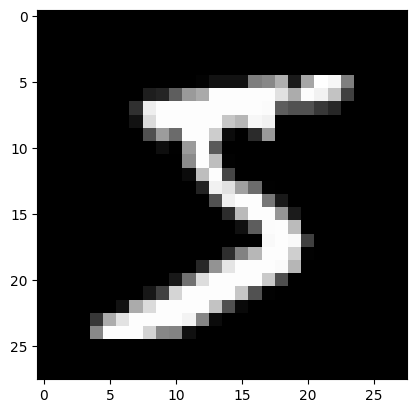

In [161]:
# Show the image with matplotlib
plt.imshow(image, cmap='gray')
plt.show()  

In [162]:
# Show the image as a matrix
for row in image:
    for val in row:
        if val > 0: 
            print(' # ', end='')
        else:
            print(' . ', end='')
    print()

 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  . 
 .  .  .  .  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  . 
 .  .  .  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  . 
 .  .  .  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  #  #  #  #  #  #  #  .  #  #  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  .  .  .  .  .  .  .

In [163]:
split = 4 # must be divisible by the square image shape
          # for ex. 28x28 -> 4, 7, 14, 28 



section = []
for i in range(7):
    for j in range(7):
        section.append(
            image[4*i:4*(i+1), 4*j:4*(j+1)]
        )

for s in section:
    for row in s:
        for col in row:
            if col > 0: 
                print(' # ', end='')
            else:
                print(' . ', end='')
        print()
    print()

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  # 

 .  .  .  . 
 .  .  .  . 
 #  #  #  # 
 #  #  #  # 

 .  .  .  . 
 #  #  #  # 
 #  #  #  # 
 #  #  #  # 

 .  .  .  . 
 #  #  #  # 
 #  #  #  # 
 #  #  #  # 

 .  .  .  . 
 #  #  #  # 
 #  #  #  # 
 #  #  #  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 .  .  .  # 
 .  .  .  . 
 .  .  .  . 
 .  .  .  . 

 #  #  #  # 
 #  #  #  # 
 .  #  #  # 
 .  .  .  # 

 #  #  #  # 
 #  #  #  . 
 #  #  .  . 
 #  #  #  . 

 #  #  .  . 
 #  #  .  . 
 .  .  .  . 
 .  .  

In [164]:
# reconstruct the image sections

rows = []
for i in range(7):
    cols = []
    for j in range(7):
        cols.append(
            section[7*i+j]
        )
        
    rows.append(cols)
    

for r in rows:
    for i in range(4):
        for c in r:
            for j in range(4):
                if c[i][j] > 0: 
                    print(' # ', end='')
                else:
                    print(' . ', end='')
            print('  ', end='')
        print()
    print()
    

 .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .   
 .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .   
 .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .   
 .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .   

 .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .    .  .  .  .   
 .  .  .  .    .  .  .  .    .  .  .  .    #  #  #  #    #  #  #  #    #  #  #  #    .  .  .  .   
 .  .  .  .    .  .  .  .    #  #  #  #    #  #  #  #    #  #  #  #    #  #  #  #    .  .  .  .   
 .  .  .  .    .  .  .  #    #  #  #  #    #  #  #  #    #  #  #  #    #  #  #  .    .  .  .  .   

 .  .  .  .    .  .  .  #    #  #  #  #    #  #  #  #    #  #  .  .    .  .  .  .    .  .  .  .   
 .  .  .  .    .  .  .  .    #  #  #  #    #  #  #  .    #  #  .  .    .  .  .  .    .  .  .  .   
 .  .  .

In [165]:
# Get the average brightness of each section

brightness = []

for s in section:
    brightness.append(np.mean(s))

        
for i in range(7):
    for j in range(7):
        print(f'{brightness[4*i+j]:.2f}', end=' ')
    print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.01 0.32 0.49 
0.01 0.32 0.49 0.50 0.42 0.00 0.00 
0.42 0.00 0.00 0.00 0.46 0.53 0.17 
0.46 0.53 0.17 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.49 0.29 0.00 
0.49 0.29 0.00 0.00 0.00 0.00 0.00 


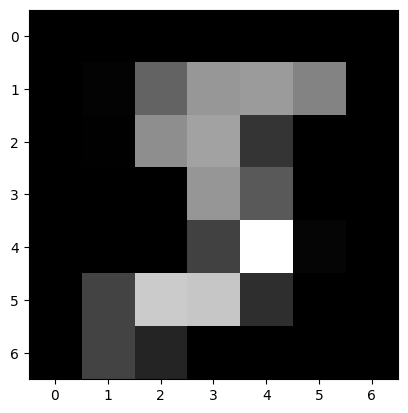

In [166]:
# Show the brightness as a matrix image
plt.imshow(np.array(brightness).reshape(7, 7), cmap='gray')
plt.show()

In [168]:
# Downscale all images to 7x7 sections

# Iterate over the images and labels together
for image, label in zip(x_train, y_train):
    # Now you can use `image` and `label` at the same index
    print(f"Image shape: {image.shape}, Label: {label}")


ValueError: too many values to unpack (expected 2)